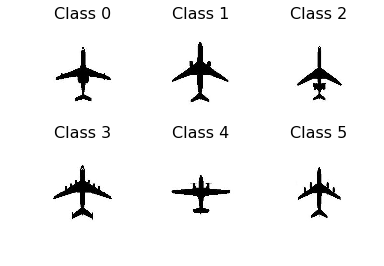

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

qtyTrainData = 5

# Print classes

for classNumber in range(0, 6):
    img_path = "../Data/aircraft-"+str(classNumber)+"/0.jpg"
    img = cv2.imread(img_path)
    plt.subplot(2, 3, classNumber+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Class " + str(classNumber), fontsize=16)

In [234]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def addImageData(hull, classNumber):
    points = []
    
    for contour in hull:
        for point in contour:
            if(point[0][0]!=0 and point[0][0]!=199 and point[0][1]!=0 and point[0][1]!=199):
                points.append([point[0][0], point[0][1]])
    
    hull = ConvexHull(points)
    #print(hull.simplices) #print indexes
    

    for simplex in hull.simplices:
        plt.plot([points[simplex[0]][0] points[simplex[1]][0]], [points[simplex[0]][1], points[simplex[1]][1]], 'k-')


SyntaxError: invalid syntax (<ipython-input-234-eb0953565f0c>, line 16)

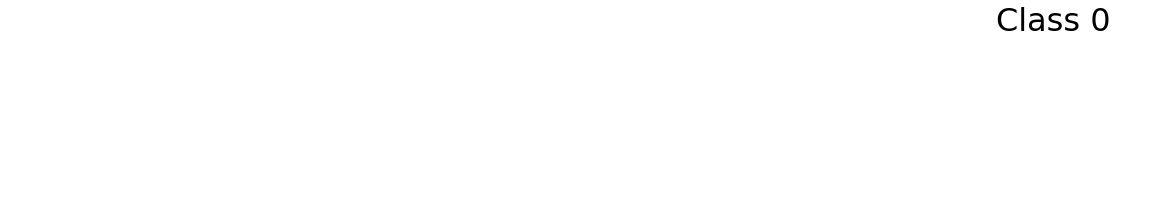

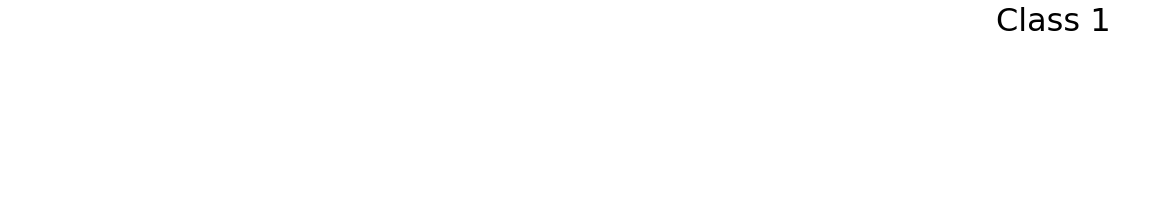

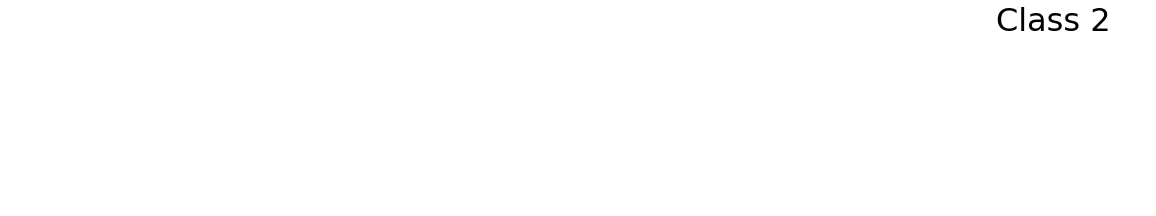

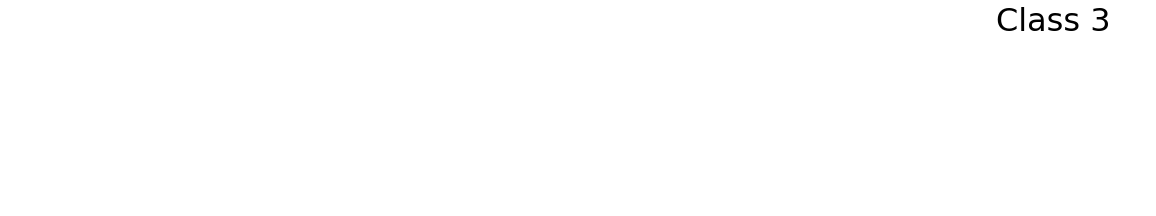

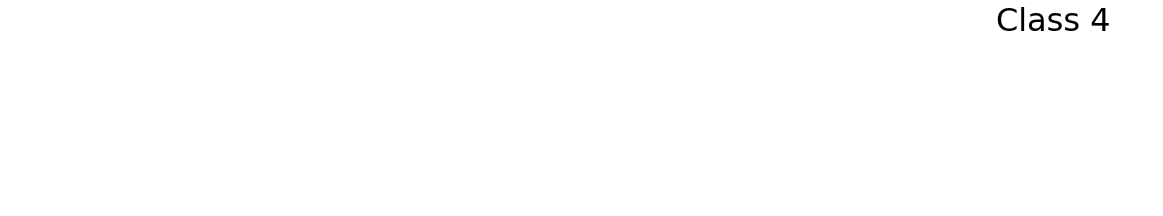

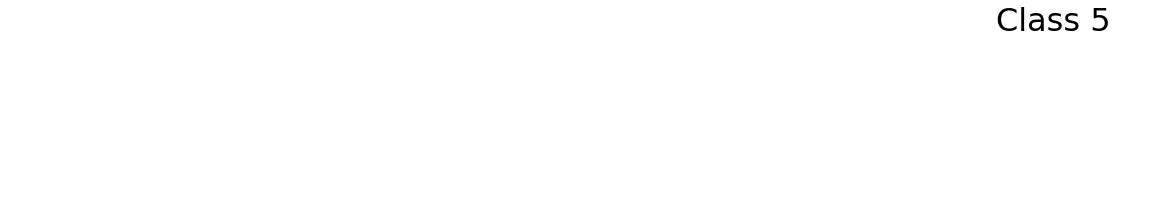

In [233]:
# Generate convex hull

for classNumber in range(0, 6):
    plt.figure(classNumber, figsize=(20, 20))
    for trainDataNumber in range(0,qtyTrainData):
        img_path = "../Data/aircraft-"+str(classNumber)+"/"+str(trainDataNumber)+".jpg"
        img = cv2.imread(img_path)
        
        ##### Generate Convex hull #####
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.blur(gray, (3, 3))
        #binarize the image
        ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
        # Finding contours for the binarized
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # create hull array for convex hull points
        hull = []
        convexityDefects = [] 

        # calculate points for each contour
        for i in range(len(contours)):
            # creating convex hull object for each contour
            hull.append(cv2.convexHull(contours[i], False))

        # create an empty black image
        drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

        # draw contours and hull points, and find convexity defects
        for i in range(len(contours)):
            color_contours = (0, 255, 0) # green - color for contours
            color = (255, 0, 0) # blue - color for convex hull
            # draw ith contour
            cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
            # draw ith convex hull object
            cv2.drawContours(drawing, hull, i, color, 1, 8)

        plt.subplot(6, qtyTrainData, trainDataNumber+1)
        addImageData(hull, classNumber)
        
        #plt.imshow(drawing) # Uncommment this line to see the plane img
        plt.axis("off")
    plt.title("Class " + str(classNumber), fontsize=32)
    
